In [1]:
import pandas as pd

df = pd.read_pickle('./data/flats_dirty.pkl')
df

,url,Rynek,Cena,Powierzchnia,Cena za m2,Liczba pokoi,Piętro,Liczba pięter,Czynsz administracyjny,Typ mieszkania,...,Powierzchnia przedpokoju,Powierzchnia kuchni,Wysokość pomieszczeń (cm),Liczba oddzielnych toalet,Stan mieszkania,Ciepła woda,Rodzaj ogrzewania,Typ okien,Alarm,Klimatyzacja
0,https://freedom.pl/oferta/mieszkanie-na-sprzed...,Wtórny,756 000 zł,47.88 m2,15 789 zł,2,2,4,930,Apartament,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://freedom.pl/oferta/mieszkanie-na-sprzed...,Wtórny,400 000 zł,43.2 m2,9 259 zł,2,4,4,710,Rozkładowe,...,3.4,"3,8 m2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://freedom.pl/oferta/mieszkanie-na-sprzed...,Wtórny,475 000 zł,32.75 m2,14 504 zł,2,4,6,290,Apartament,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://freedom.pl/oferta/mieszkanie-na-sprzed...,Wtórny,475 000 zł,68.5 m2,6 934 zł,3,4,4,770,Rozkładowe,...,NaN,7 m2,260,1,NaN,NaN,NaN,NaN,NaN,NaN
4,https://freedom.pl/oferta/mieszkanie-na-sprzed...,Wtórny,550 000 zł,41.81 m2,13 155 zł,2,1,4,544.25,Jednopoziomowe,...,NaN,NaN,260,NaN,Bardzo dobry,Wodociąg miejski,CO miejskie,PCV,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,https://freedom.pl/oferta/mieszkanie-na-sprzed...,Wtórny,950 000 zł,103.38 m2,9 189 zł,4,6,7,1342,Rozkładowe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,https://freedom.pl/oferta/mieszkanie-na-sprzed...,Wtórny,352 440 zł,32.04 m2,11 000 zł,1,0,4,504.99,"Apartament ,Jednopoziomowe",...,NaN,NaN,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,https://freedom.pl/oferta/mieszkanie-na-sprzed...,Wtórny,1 090 000 zł,52 m2,20 962 zł,2,1,5,NaN,Apartament,...,NaN,NaN,NaN,NaN,Wysoki standard,Wodociąg miejski,CO miejskie,Aluminiowe,Tak,Tak
91,https://freedom.pl/oferta/mieszkanie-na-sprzed...,Wtórny,620 000 zł,36.82 m2,16 839 zł,2,5,6,250,Jednopoziomowe,...,NaN,NaN,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df1 = pd.DataFrame()

df.columns

Index(['url', 'Rynek', 'Cena', 'Powierzchnia', 'Cena za m2', 'Liczba pokoi',
       'Piętro', 'Liczba pięter', 'Czynsz administracyjny', 'Typ mieszkania',
       'Rodzaj nieruchomości', 'Stan nieruchomości', 'Umeblowanie',
       'Dostępne od', 'Numer oferty', 'Zobacz spacer 360°', 'Rodzaj budynku',
       'Rok budowy', 'Balkon', 'Winda', 'Domofon', 'Monitoring', 'Ochrona',
       'Recepcja', 'Teren ogrodzony', 'Podłogi w pomieszczeniach',
       'Typ kuchni', 'Liczba łazienek', 'Garaż/Miejsca parkingowe',
       'Informacje o Garażu/Miejscach parkingowych',
       'Liczba miejsc parkingowych', 'Cena za garaż/Miejsce parkingowe',
       'Adres', 'Komunikacja', 'W pobliżu', 'opis', 'Materiał',
       'Powierzchnie pokoi', 'Powierzchnia przedpokoju', 'Powierzchnia kuchni',
       'Wysokość pomieszczeń (cm)', 'Liczba oddzielnych toalet',
       'Stan mieszkania', 'Ciepła woda', 'Rodzaj ogrzewania', 'Typ okien',
       'Alarm', 'Klimatyzacja'],
      dtype='object')

## Data analysis

In [3]:
df1['url'] = df['url']
df1['Liczba pokoi'] = df['Liczba pokoi']
df1['Piętro'] = df['Piętro']
df1['Liczba pięter'] = df['Liczba pięter']
df1['Adres'] = df['Adres']
df1['opis'] = df['opis']

### Rynek

In [4]:
df1['Rynek'] = df['Rynek'].astype('category')
df1['Rynek'].value_counts()

Rynek
Wtórny       91
Pierwotny     2
Name: count, dtype: int64

### Cena całkowita

In [5]:
df1["Cena"] = df["Cena"].str.replace(" zł", "").str.replace(" ", "").astype(float)
df1["Cena"].describe()

count    9.300000e+01
mean     6.390156e+05
std      2.639069e+05
min      1.200000e+05
25%      4.700000e+05
50%      5.970000e+05
75%      7.980000e+05
max      1.499000e+06
Name: Cena, dtype: float64

### Powierzchnia

Text(0.5, 0, 'Powierzchnia [m2]')

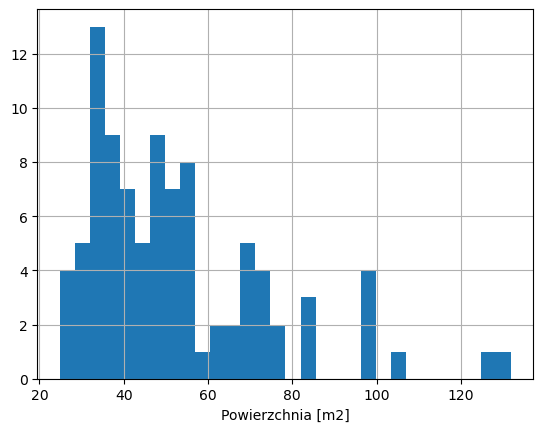

In [6]:
df1["Powierzchnia"] = df["Powierzchnia"].str.replace(" m2", "").str.replace(",", ".").astype(float)
df1["Powierzchnia"].hist(bins=30).set_xlabel("Powierzchnia [m2]")

### Cena za m2

Text(0.5, 0, 'Cena za metr [zł/m2]')

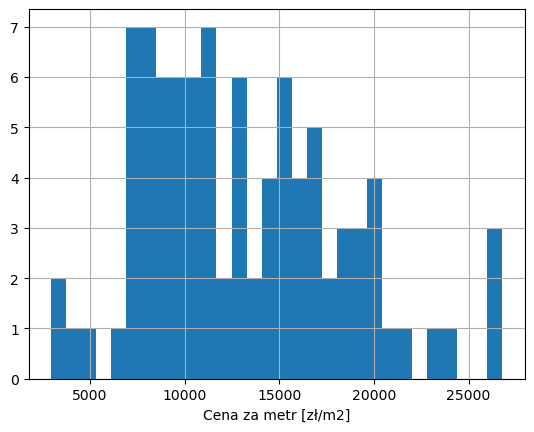

In [7]:
df1["Cena za m2"] = df["Cena za m2"].str.replace(" zł", "").str.replace(" ", "").astype(float)
df1["Cena za m2"].hist(bins=30).set_xlabel("Cena za metr [zł/m2]")

### Czynsz administracyjny

In [8]:
for (idx, row) in df[df["Czynsz administracyjny"].isna()][["Numer oferty", "opis"]].iterrows():
    numer_oferty = row.iloc[0]
    opis = row.iloc[1]
    x = row['opis'].find("czynsz")
    print(numer_oferty, opis[x-64:x+37])

25806/3685/OMS 
29044/3685/OMS 
31096/3685/OMS 
26877/3685/OMS 
29243/3685/OMS Apartament jest obsługiwany i wynajmowany przez hotel ze stałym czynszem najmu w wysokości 25480  zł.
31400/3685/OMS 
24123/3685/OMS 
21279/3685/OMS Apartament jest obsługiwany i wynajmowany przez hotel ze stałym czynszem najmu w wysokości 39 tys. zł
29015/3685/OMS 


In [9]:
df.loc[df["Numer oferty"]=="21279/3685/OMS", "Czynsz administracyjny"] = 39000 / 12
df.loc[df["Numer oferty"]=="29243/3685/OMS", "Czynsz administracyjny"] = 25480 / 12

Text(0.5, 0, 'Czynsz administracyjny [zł]')

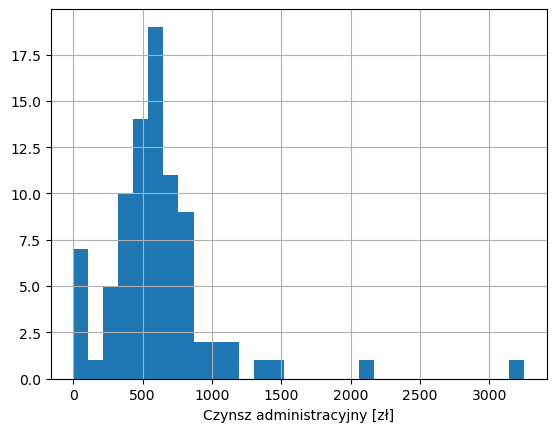

In [10]:
df1["Czynsz administracyjny"] = df["Czynsz administracyjny"].astype(float)
df1["Czynsz administracyjny"].hist(bins=30).set_xlabel("Czynsz administracyjny [zł]")

### Rodzaj nieruchomości

In [11]:
df["Rodzaj nieruchomości"].astype('category').unique()

['Mieszkanie']
Categories (1, object): ['Mieszkanie']

### Stan nieruchomości

In [12]:
df1["Stan nieruchomości"] = df["Stan nieruchomości"].astype('category')
df1["Stan nieruchomości"].cat.categories

Index(['Bardzo dobry', 'Do adaptacji', 'Do drobnego remontu',
       'Do kapitalnego remontu', 'Do odnowienia', 'Do odświeżenia',
       'Do remontu', 'Do wykończenia', 'Dobry', 'Idealny', 'Po remoncie',
       'Stan deweloperski', 'Wysoki standard'],
      dtype='object')

### Umeblowanie

In [13]:
df1["Umeblowanie"] = df["Umeblowanie"].astype('category')
df1["Umeblowanie"].cat.categories

Index(['Częściowo', 'Możliwe', 'Nie', 'Tak'], dtype='object')

### Dostępne od

Text(0.5, 0, 'Dostępne od')

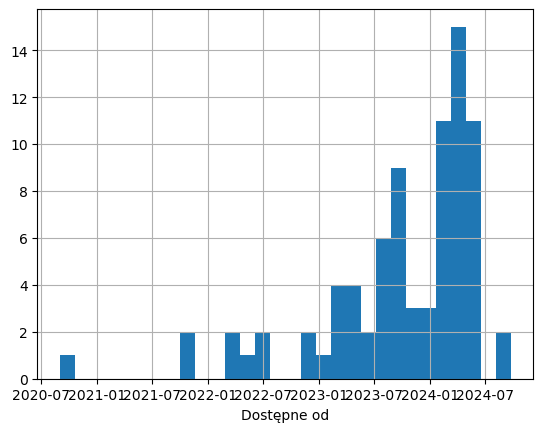

In [14]:
df1["Dostępne od"] = df["Dostępne od"].astype('datetime64[ns]')
df1["Dostępne od"].hist(bins=30).set_xlabel("Dostępne od")

### Numer oferty

In [15]:
df1["Numer oferty"] = df["Numer oferty"]
df1["Numer oferty"].isna().sum()

0

### Rodzaj budynku

In [16]:
df1["Rodzaj budynku"] = df["Rodzaj budynku"].astype('category')
df1["Rodzaj budynku"].cat.categories

Index(['Apartamentowo-handlowy', 'Biurowo-handlowy', 'Budynek apartamentowy',
       'Część domu', 'Dom', 'Hotel', 'Kamienica', 'Mieszkalno-biurowy',
       'Niski blok', 'Segment'],
      dtype='object')

### Rok budowy

Text(0.5, 0, 'Rok budowy')

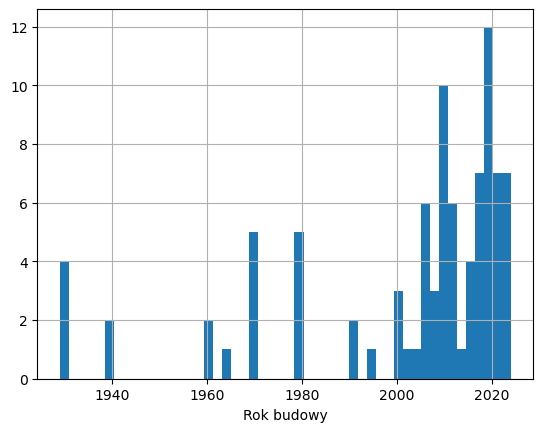

In [17]:
df1["Rok budowy"] = df["Rok budowy"].astype(float)
df1["Rok budowy"].hist(bins=50).set_xlabel("Rok budowy")

### Materiał

In [18]:
df1["Materiał"] = df["Materiał"].fillna("Inne").astype('category')
df1["Materiał"].value_counts()

Materiał
Cegła           22
Silikat         22
Ceramika        19
Mieszany         9
Bloczki          7
Inne             7
Wielka Płyta     3
Pustak           2
Drewno           1
Ytong            1
Name: count, dtype: int64

### Winda

In [19]:
df1["Winda"] = df["Winda"].fillna("Nie").astype('category')
df1["Winda"].value_counts()

Winda
Tak    58
Nie    35
Name: count, dtype: int64

### Domofon

In [20]:
df1["Domofon"] = df["Domofon"].fillna("Nie").astype('category')
df1["Domofon"].value_counts()

Domofon
Tak    80
Nie    13
Name: count, dtype: int64

### Wysokość pomieszczeń (cm)

In [21]:
df1["Wysokość pomieszczeń (cm)"] = df["Wysokość pomieszczeń (cm)"].astype(float).apply(lambda x: x if x > 200 else x * 100)
df1["Wysokość pomieszczeń (cm)"] = df1["Wysokość pomieszczeń (cm)"].fillna(260)
df1["Wysokość pomieszczeń (cm)"].value_counts()

Wysokość pomieszczeń (cm)
260.0    54
250.0    17
255.0     6
270.0     6
265.0     5
330.0     2
316.0     1
257.0     1
340.0     1
Name: count, dtype: int64

### Podłogi w pomieszczeniach

In [22]:
df1["Podłogi w pomieszczeniach"] = df["Podłogi w pomieszczeniach"].fillna('inne')

df1.loc[df1["Podłogi w pomieszczeniach"].str.contains("Panele"), "Podłoga_Panele"] = True
df1["Podłoga_Panele"] = df1["Podłoga_Panele"].fillna(False)

df1.loc[df1["Podłogi w pomieszczeniach"].str.contains("Terakota"), "Podłoga_Terakota"] = True
df1["Podłoga_Terakota"] = df1["Podłoga_Terakota"].fillna(False)

df1.loc[df1["Podłogi w pomieszczeniach"].str.contains("Wykładzina"), "Podłoga_Wykładzina"] = True
df1["Podłoga_Wykładzina"] = df1["Podłoga_Wykładzina"].fillna(False)

df1.loc[df1["Podłogi w pomieszczeniach"].str.contains("Płytki"), "Podłoga_Płytki"] = True
df1["Podłoga_Płytki"] = df1["Podłoga_Płytki"].fillna(False)

df1.loc[df1["Podłogi w pomieszczeniach"].str.contains("Deska podłogowa"), "Podłoga_Deska"] = True
df1["Podłoga_Deska"] = df1["Podłoga_Deska"].fillna(False)

df1.loc[df1["Podłogi w pomieszczeniach"].str.contains("Wylewka betonowa"), "Podłoga_Wylewka"] = True
df1["Podłoga_Wylewka"] = df1["Podłoga_Wylewka"].fillna(False)

df1.loc[(df1["Podłoga_Panele"] == False) & (df1["Podłoga_Terakota"] == False) & (df1["Podłoga_Wykładzina"] == False) & (df1["Podłoga_Płytki"] == False) & (df1["Podłoga_Deska"] == False) & (df1["Podłoga_Wylewka"] == False), "Podłoga_Inna"] = True
df1["Podłoga_Inna"] = df1["Podłoga_Inna"].fillna(False)

df1 = df1.drop(["Podłogi w pomieszczeniach"], axis=1)

/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_6556/997208011.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["Podłoga_Panele"] = df1["Podłoga_Panele"].fillna(False)
/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_6556/997208011.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["Podłoga_Terakota"] = df1["Podłoga_Terakota"].fillna(False)
/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_6556/997208011.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change

### Typ kuchni

In [23]:
df1["Typ kuchni"] = df["Typ kuchni"].fillna("Brak").astype('category')
df1["Typ kuchni"].value_counts()

Typ kuchni
Aneks        53
Widna        16
Oddzielna    10
Otwarta       8
Brak          5
Ciemna        1
Name: count, dtype: int64

### Liczba łazienek

In [24]:
df1["Liczba łazienek"] = df["Liczba łazienek"].fillna(0)
df1["Liczba łazienek"].value_counts()

Liczba łazienek
1    83
0     5
2     5
Name: count, dtype: int64

### Miejsce parkingowe

In [25]:
df["Informacje o Garażu/Miejscach parkingowych"].value_counts()

Informacje o Garażu/Miejscach parkingowych
Na ulicy                                                                                 22
Miejsce parkingowe                                                                       14
Garaż                                                                                     4
Parking strzeżony                                                                         4
Parking niestrzeżony                                                                      4
Parking podziemny                                                                         3
Płatny dodatkowo                                                                          2
Na ulicy, Parking strzeżony                                                               2
Parking strzeżony, Na ulicy                                                               2
Parking podziemny, Płatny dodatkowo                                                       1
Parking podziemny, Garaż, Parking str

In [26]:
df1["Parking_Na_Ulicy"] = df["Informacje o Garażu/Miejscach parkingowych"].str.contains("Na ulicy")

df1["Parking_Miejsce"] = df["Informacje o Garażu/Miejscach parkingowych"].str.contains("Miejsce parkingowe")

df1["Parking_Garaż"] = df["Informacje o Garażu/Miejscach parkingowych"].str.contains("Garaż")
df1["Parking_Garaż"] |= df["Informacje o Garażu/Miejscach parkingowych"].str.contains("Jednostanowiskowy")
df1["Parking_Garaż"] |= df["Informacje o Garażu/Miejscach parkingowych"].str.contains("podziemny")

df1["Parking_Inny"] = ~(df1["Parking_Na_Ulicy"] | df1["Parking_Miejsce"] | df1["Parking_Garaż"])

df1[["Parking_Na_Ulicy", "Parking_Miejsce", "Parking_Garaż", "Parking_Inny"]] = df1[["Parking_Na_Ulicy", "Parking_Miejsce", "Parking_Garaż", "Parking_Inny"]].fillna(False)
df1[["Parking_Na_Ulicy", "Parking_Miejsce", "Parking_Garaż", "Parking_Inny"]].value_counts()

/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_6556/3245654452.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[["Parking_Na_Ulicy", "Parking_Miejsce", "Parking_Garaż", "Parking_Inny"]] = df1[["Parking_Na_Ulicy", "Parking_Miejsce", "Parking_Garaż", "Parking_Inny"]].fillna(False)


Parking_Na_Ulicy  Parking_Miejsce  Parking_Garaż  Parking_Inny
True              False            False          False           29
False             False            False          True            28
                  True             False          False           17
                  False            True           False           15
                  True             True           False            2
True              False            True           False            1
                  True             False          False            1
Name: count, dtype: int64

### Komunikacja

In [27]:
df1["Komunikacja_Autobus"] = df["Komunikacja"].str.contains("Autobus").fillna(False)
df1["Komunikacja_Kolej"] = df["Komunikacja"].str.contains("Kolej").fillna(False)

df1["Komunikacja_PKS"] = df["Komunikacja"].str.contains("PKS").fillna(False)
df1["Komunikacja_PKS"] |= df["Komunikacja"].str.contains("Bus").fillna(False)

df1[["Komunikacja_Autobus","Komunikacja_Kolej","Komunikacja_PKS"]].value_counts()

/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_6556/3926830141.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["Komunikacja_Autobus"] = df["Komunikacja"].str.contains("Autobus").fillna(False)
/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_6556/3926830141.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["Komunikacja_Kolej"] = df["Komunikacja"].str.contains("Kolej").fillna(False)
/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_6556/3926830141.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, 

Komunikacja_Autobus  Komunikacja_Kolej  Komunikacja_PKS
True                 False              False              63
False                False              False              12
True                 True               False               9
                                        True                4
False                True               False               2
                     False              True                1
                     True               True                1
True                 False              True                1
Name: count, dtype: int64

### W pobliżu

In [28]:
df["W pobliżu"].to_list()

['Basen, Fitness, Park, Restauracja, Plac zabaw, Morze, Zabudowa niska, Kościół, Sklep, Apteka',
 'Rzeka, Morze, Przystań, Hala sportowa, Restauracja, Szkoła, Szpital, Park, Fitness, Bank, Basen, Apteka, Sklep, Przychodnia lekarska',
 'Morze, Szkoła, Szpital, Apteka, Kościół, Park, Hala sportowa, Przychodnia lekarska, Centrum handlowe, Fitness, Rzeka, Sklep, Przystań, Basen, Bank, Restauracja, Bar',
 'Park, Zabudowa niska, Kościół, Żłobek, Plac zabaw, Przedszkole, Sklep, Apteka, Szkoła',
 'Bazarek, Apteka, Sklep, Żłobek, Morze, Park, Zabudowa niska, Plac zabaw, Szkoła, Przedszkole, Centrum handlowe',
 'Sklep, Apteka, Zabudowa niska, Morze',
 'Plac zabaw, Morze, Park, Kort tenisowy, Restauracja, Basen',
 'Centrum handlowe, Plac zabaw, Kościół, Zabudowa niska, Sklep, Szkoła, Przedszkole, Morze, Park',
 'Rzeka, Morze, Szkoła, Park, Basen, Restauracja, Fitness, Sklep, Przystań, Zabudowa niska, Plac zabaw, Kościół',
 'Park, Las, Morze, Plac zabaw, Przychodnia lekarska, Szkoła, Przedszkole',

In [29]:
around = set()

for item in df["W pobliżu"].dropna().to_list():
    for x in item.split(", "):
        around.add(x)

for item in around:
    df1[f"W_pobliżu_{item}"] = df["W pobliżu"].str.contains(item).fillna(False)

df1[[f"W_pobliżu_{item}" for item in around]]

/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_6556/153758542.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[f"W_pobliżu_{item}"] = df["W pobliżu"].str.contains(item).fillna(False)
/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_6556/153758542.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[f"W_pobliżu_{item}"] = df["W pobliżu"].str.contains(item).fillna(False)
/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_6556/153758542.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is

,W_pobliżu_Szpital,W_pobliżu_Bocznica kolejowa,W_pobliżu_Żłobek,W_pobliżu_Plac zabaw,W_pobliżu_Bank,W_pobliżu_Park,W_pobliżu_Hala sportowa,W_pobliżu_Blacharnia,W_pobliżu_Bazarek,W_pobliżu_Przychodnia lekarska,...,W_pobliżu_Zabudowa niska,W_pobliżu_Przedszkole,W_pobliżu_Rzeka,W_pobliżu_Szkoła,W_pobliżu_Basen,W_pobliżu_Apteka,W_pobliżu_Fitness,W_pobliżu_Komenda policji,W_pobliżu_Kościół,W_pobliżu_Morze
0,False,False,False,True,False,True,False,False,False,False,...,True,False,False,False,True,True,True,False,True,True
1,True,False,False,False,True,True,True,False,False,True,...,False,False,True,True,True,True,True,False,False,True
2,True,False,False,False,True,True,True,False,False,True,...,False,False,True,True,True,True,True,False,True,True
3,False,False,True,True,False,True,False,False,False,False,...,True,True,False,True,False,True,False,False,True,False
4,False,False,True,True,False,True,False,False,True,False,...,True,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,False,False,False,True,True,True,False,False,False,True,...,False,True,False,True,False,True,True,False,False,True
89,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
90,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
91,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False


### Typ mieszkania

In [30]:
flat_type = set()

for item in df["Typ mieszkania"].fillna("inne").astype(str).to_list():
    for x in item.split(","):
        x = "_".join(x.strip().split(" "))
        flat_type.add(x)  

for item in flat_type:
    df1[f"Typ_mieszkania_{item}"] = df["Typ mieszkania"].str.contains(item).fillna(False)

df1[[f"Typ_mieszkania_{item}" for item in flat_type]]

/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_6556/1885219543.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[f"Typ_mieszkania_{item}"] = df["Typ mieszkania"].str.contains(item).fillna(False)
/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_6556/1885219543.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[f"Typ_mieszkania_{item}"] = df["Typ mieszkania"].str.contains(item).fillna(False)
/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_6556/1885219543.py:9: FutureWarning: Downcasting object dtype arrays on .fi

,Typ_mieszkania_Z_pokojami_przechodnimi,Typ_mieszkania_Apartament,Typ_mieszkania_Jednopoziomowe,Typ_mieszkania_Dwupoziomowe,Typ_mieszkania_Rozkładowe,Typ_mieszkania_inne,Typ_mieszkania_Piętro_domu,Typ_mieszkania_Z_antresolą,Typ_mieszkania_Z_pokojem_przechodnim
0,False,True,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
88,False,False,False,False,True,False,False,False,False
89,False,True,True,False,False,False,False,False,False
90,False,True,False,False,False,False,False,False,False
91,False,False,True,False,False,False,False,False,False


### Balkon

In [31]:
df1["Balkon"] = df["Balkon"].fillna("Nie").astype('category')
df1["Balkon"].value_counts()

Balkon
Tak    71
Nie    22
Name: count, dtype: int64

### Alarm

In [32]:
df1["Alarm"] = df["Alarm"].fillna("Nie").astype('category')
df1["Alarm"].value_counts()

Alarm
Nie    80
Tak    13
Name: count, dtype: int64

### Monitoring

In [33]:
df1["Monitoring"] = df["Monitoring"].fillna("Nie").astype('category')
df1["Monitoring"].value_counts()

Monitoring
Tak    58
Nie    35
Name: count, dtype: int64

### Ochrona

In [34]:
df1["Ochrona"] = df["Ochrona"].fillna("Nie").astype('category')
df1["Ochrona"].value_counts()

Ochrona
Nie    61
Tak    32
Name: count, dtype: int64

### Recepcja

In [35]:
df1["Recepcja"] = df["Recepcja"].fillna("Nie").astype('category')
df1["Recepcja"].value_counts()

Recepcja
Nie    67
Tak    26
Name: count, dtype: int64

### Teren ogrodzony

In [36]:
df1["Teren ogrodzony"] = df["Teren ogrodzony"].fillna("Nie").astype('category')
df1["Teren ogrodzony"].value_counts()

Teren ogrodzony
Tak    50
Nie    43
Name: count, dtype: int64

### Liczba oddzielnych toalet

In [37]:
df1["Liczba oddzielnych toalet"] = df["Liczba oddzielnych toalet"].fillna(0).astype('category')
df1["Liczba oddzielnych toalet"].value_counts()

Liczba oddzielnych toalet
0    75
1    14
0     2
2     2
Name: count, dtype: int64

## Podsumowanie

In [38]:
df1

,url,Liczba pokoi,Piętro,Liczba pięter,Adres,opis,Rynek,Cena,Powierzchnia,Cena za m2,...,Typ_mieszkania_Piętro_domu,Typ_mieszkania_Z_antresolą,Typ_mieszkania_Z_pokojem_przechodnim,Balkon,Alarm,Monitoring,Ochrona,Recepcja,Teren ogrodzony,Liczba oddzielnych toalet
0,https://freedom.pl/oferta/mieszkanie-na-sprzed...,2,2,4,"Kołobrzeg, Zachodniopomorskie, ul. Muszelkowa",Zarabiający apartament 2-pok.z basenem!Polanki...,Wtórny,756000.0,47.88,15789.0,...,False,False,False,Tak,Nie,Tak,Tak,Tak,Tak,0
1,https://freedom.pl/oferta/mieszkanie-na-sprzed...,2,4,4,"Kołobrzeg, Zachodniopomorskie, ul. al. I Armii...","2 pokoje z widokiem na rzekę, blisko morza!\nM...",Wtórny,400000.0,43.20,9259.0,...,False,False,False,Tak,Nie,Nie,Nie,Nie,Nie,0
2,https://freedom.pl/oferta/mieszkanie-na-sprzed...,2,4,6,"Kołobrzeg, Zachodniopomorskie, ul. Młyńska","Młyńska 10,atrakcyjny apartament 2-pok. w cent...",Wtórny,475000.0,32.75,14504.0,...,False,False,False,Tak,Nie,Tak,Nie,Nie,Tak,0
3,https://freedom.pl/oferta/mieszkanie-na-sprzed...,3,4,4,"Kołobrzeg, Zachodniopomorskie, ul. Bolesława K...","Duże, 3-pok.mieszkanie z funkcjonalnym rozkład...",Wtórny,475000.0,68.50,6934.0,...,False,False,False,Tak,Nie,Nie,Nie,Nie,Nie,1
4,https://freedom.pl/oferta/mieszkanie-na-sprzed...,2,1,4,"Kołobrzeg, Zachodniopomorskie, ul. Słowińców",Przytulne dwupokojowe mieszkanie w Kołobrzegu\...,Wtórny,550000.0,41.81,13155.0,...,False,False,False,Tak,Nie,Tak,Nie,Nie,Tak,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,https://freedom.pl/oferta/mieszkanie-na-sprzed...,4,6,7,"Kołobrzeg, Zachodniopomorskie, ul. Kupiecka","Atrakcyjne 4-pokojowe, 2 balkony, gabinet, gar...",Wtórny,950000.0,103.38,9189.0,...,False,False,False,Tak,Nie,Nie,Nie,Nie,Nie,0
89,https://freedom.pl/oferta/mieszkanie-na-sprzed...,1,0,4,"Kołobrzeg, Zachodniopomorskie, ul. Jana Kaspro...",Apartament 350 m od morza\nKameralny apartamen...,Wtórny,352440.0,32.04,11000.0,...,False,False,False,Tak,Nie,Tak,Nie,Nie,Nie,0
90,https://freedom.pl/oferta/mieszkanie-na-sprzed...,2,1,5,"Mielno, Zachodniopomorskie,",Luksusowy Apartament nad morzem\nPILNIE SPRZE...,Wtórny,1090000.0,52.00,20962.0,...,False,False,False,Tak,Tak,Tak,Tak,Tak,Tak,0
91,https://freedom.pl/oferta/mieszkanie-na-sprzed...,2,5,6,"Kołobrzeg, Zachodniopomorskie, ul. Młyńska","Nowy apartament, w idealnym stanie\nNowoczesny...",Wtórny,620000.0,36.82,16839.0,...,False,False,False,Tak,Nie,Tak,Nie,Nie,Nie,0


In [39]:
# df1.to_csv('./data/flats_clean.csv', index=False)

In [40]:
df1.to_pickle('./data/flats_clean.pkl')